## SVM Checker

In [2]:
!pip install cvxopt

    100% |████████████████████████████████| 5.6MB 245kB/s ta 0:00:011


In [3]:
%matplotlib inline

import svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools




def example(num_samples=10, num_features=2, grid_size=20):
    
    samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))
    
    labels = 2 * (samples.sum(axis=1) > 0) - 1.0
    
    trainer = svm.SVMTrainer(svm.Kernel.linear())
    
    predictor = trainer.train(samples, labels)

    plot(predictor, samples, labels, grid_size)


def plot(predictor, X, y, grid_size):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, grid_size),
        np.linspace(y_min, y_max, grid_size),
        indexing='ij'
    )
    
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))

    Z = np.array(result).reshape(xx.shape)
    
    plt.contourf(
        xx, yy, Z,
        cmap=cm.Paired,
        levels=[-0.01, 0.01],
        extend='both',
        alpha=0.8
    )
    
    
    plt.scatter(
        flatten(X[:, 0]),
        flatten(X[:, 1]),
        c=flatten(y),
        cmap=cm.Paired
    )
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

[[-0.9688963   0.79001132]
 [-1.15510447  0.06313222]
 [ 0.70104701 -0.05477032]
 [ 0.45665335  0.18789627]
 [-0.57041677 -0.23037885]
 [ 0.22086859 -0.95192805]
 [ 0.28262346  0.35726367]
 [-0.59391139 -1.35566287]
 [ 0.40194355 -0.82376456]
 [ 1.05929332  1.11871998]]
     pcost       dcost       gap    pres   dres
 0: -3.2087e+00 -6.7989e+00  2e+01  4e+00  2e+00
 1: -4.0656e+00 -5.5947e+00  2e+00  2e-01  1e-01
 2: -4.1971e+00 -4.4521e+00  4e-01  4e-02  2e-02
 3: -4.3867e+00 -4.4273e+00  5e-02  1e-03  6e-04
 4: -4.4067e+00 -4.4071e+00  5e-04  1e-05  6e-06
 5: -4.4069e+00 -4.4069e+00  5e-06  1e-07  6e-08
 6: -4.4069e+00 -4.4069e+00  5e-08  1e-09  6e-10
Optimal solution found.


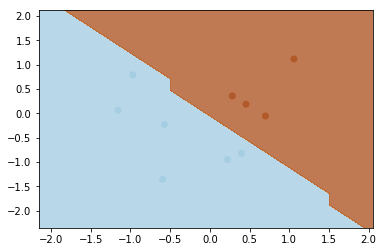

In [4]:
example()